In [2]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [3]:
import pandas as pd
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1t8YQOowjGDmUWrSXIpCA0-O09NT5a3RHCyzSzWJQDEo/edit?usp=sharing')
sheet = wb.worksheet('Sheet1')
# Now that we have the tab specified it’s time to get the data. To do this we will just call the get_all_values() function off of the sheet object we created above:
data = sheet.get_all_values()

df = pd.DataFrame(data[1:])
df.columns = data[0]

In [5]:
df = df.drop('Red', axis=1)
df

,Blue,Green,Purple,Date
0,36,178,0,2020-07-09 11:51:47
1,194,1,0,2020-07-09 12:05:35
2,252,164,0,2020-07-09 12:08:42
3,137,164,0,2020-07-09 12:10:43
4,147,79,1,2020-07-09 12:11:32
...,...,...,...,...
66,25,124,0,2020-08-13 16:11:59
67,42,122,0,2020-08-17 9:43:49
68,['224'],['24'],['1'],2021-07-23 15:33:12
69,149,233,0,2021-07-23 15:48:02


In [10]:
df['Blue'] = df['Blue'].str.replace('[\[,\],\']', '')
df['Green'] = df['Green'].str.replace('[\[,\],\']', '')
df['Purple'] = df['Purple'].str.replace('[\[,\],\']', '')
df

,Blue,Green,Purple,Date
0,36,178,0,2020-07-09 11:51:47
1,194,1,0,2020-07-09 12:05:35
2,252,164,0,2020-07-09 12:08:42
3,137,164,0,2020-07-09 12:10:43
4,147,79,1,2020-07-09 12:11:32
...,...,...,...,...
66,25,124,0,2020-08-13 16:11:59
67,42,122,0,2020-08-17 9:43:49
68,224,24,1,2021-07-23 15:33:12
69,149,233,0,2021-07-23 15:48:02


In [15]:
df['Green'] = df['Green'].astype('float32')
df['Blue'] = df['Blue'].astype('float32')
df['Purple'] = df['Purple'].astype('category')
df['Date'] = pd.to_datetime(df['Date']) 
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Blue    71 non-null     float32       
 1   Green   71 non-null     float32       
 2   Purple  71 non-null     category      
 3   Date    71 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](1), float32(2)
memory usage: 1.4 KB
None
    Blue  Green Purple                Date
0   36.0  178.0      0 2020-07-09 11:51:47
1  194.0    1.0      0 2020-07-09 12:05:35
2  252.0  164.0      0 2020-07-09 12:08:42
3  137.0  164.0      0 2020-07-09 12:10:43
4  147.0   79.0      1 2020-07-09 12:11:32


In [16]:
df['Purple'].value_counts()

0    54
1    17
Name: Purple, dtype: int64

In [22]:
df['Date'].max()

Timestamp('2021-07-23 15:48:40')

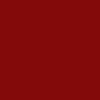

In [23]:
from colorsys import hsv_to_rgb
from PIL import Image


colors = []

inputColor = [131,	10 , 10]
for hue in range(100):
    for sat in range(100):
        # Convert color from HSV to RGB
        # rgb = hsv_to_rgb(hue/360, sat/100, 1)
        rgb = [inputColor[0], inputColor[1], inputColor[2]]
        colors.extend(rgb)

im = Image.frombytes("RGB", (100, 100), bytes(colors))
im

In [24]:
!pip install dtreeviz

     |████████████████████████████████| 60 kB 4.2 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66636 sha256=0268fe2828938b8405d5e823379904808cc3c77235e0cf7bf8141f9ce35b1bdf
  Stored in directory: /root/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz


# Build a decision tree

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


0    54
1    17
Name: Purple, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


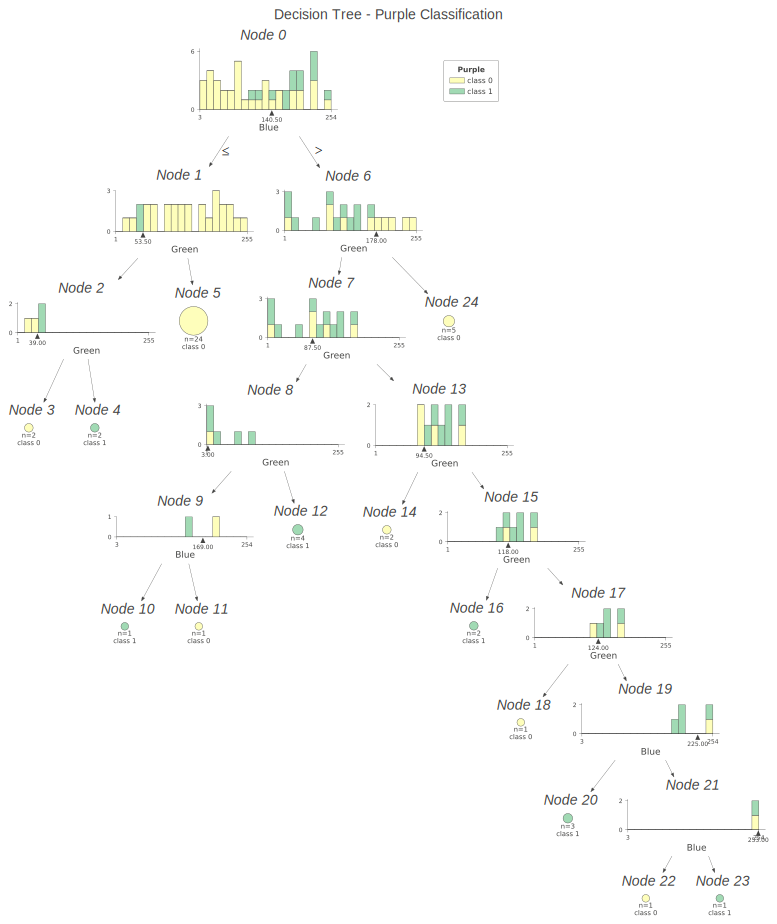

In [25]:
# !pip install dtreeviz
import matplotlib.pyplot as plt
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn import tree

from io import StringIO
from ipywidgets import Image
from dtreeviz.trees import *

# prepare the data
X=df.drop(['Purple', 'Date'],axis=1)

from sklearn.preprocessing import LabelEncoder
cols = ['Purple']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

print(df['Purple'].value_counts())

y=df['Purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fir the regressor
reg = tree.DecisionTreeClassifier(max_depth=50, random_state=42)
reg.fit(X_train, y_train)

# plot the tree
viz = dtreeviz(reg,
               x_data=X_train,
               y_data=y_train,
               target_name='Purple',
               feature_names=X.columns.to_list(),
               title="Decision Tree - Purple Classification", 
               show_node_labels = True)
viz

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  3],
       [ 1,  3]])

In [27]:
import pickle
filepath=r'PurpleRGB_model.pckl'
saved_model=pickle.dump(reg,open(filepath,'wb'))

In [28]:
df.to_csv("PurpleData.csv", index=False)

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [30]:
!cp PurpleRGB_model.pckl PurpleData.csv /content/drive/MyDrive/PGSS2021/L6-7232021/

# Exploratory Analysis in R, using Colab

In [31]:
%load_ext rpy2.ipython

In [32]:
%%R
myData <- read.csv('/content/PurpleData.csv', header = TRUE)
head(myData)

  Blue Green Purple                Date
1   36   178      0 2020-07-09 11:51:47
2  194     1      0 2020-07-09 12:05:35
3  252   164      0 2020-07-09 12:08:42
4  137   164      0 2020-07-09 12:10:43
5  147    79      1 2020-07-09 12:11:32
6   29   216      0 2020-07-09 12:18:23


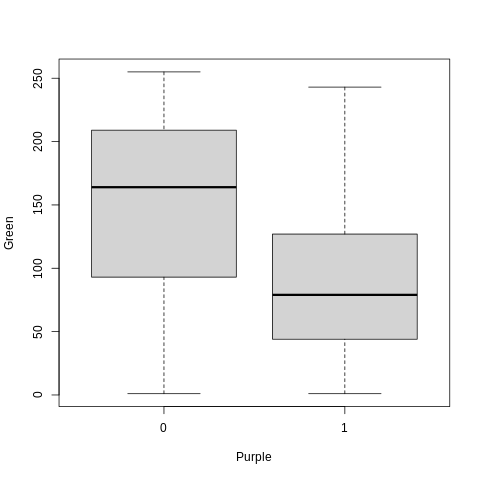

In [33]:
%%R
myData$Purple <- as.factor(myData$Purple)
boxplot(Green ~ Purple, data = myData)

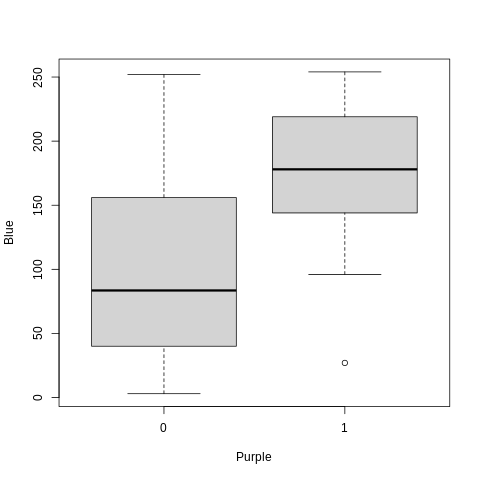

In [34]:
%%R
boxplot(Blue ~ Purple, data = myData)

# Create a streamlit app to classify the purple color

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2021-07-20 20:44:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.212.203.64, 34.195.15.150, 3.210.84.123, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.212.203.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  26.2MB/s    in 0.5s    

2021-07-20 20:44:48 (26.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')


In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'


Execute the next cell and the go to the following URL: https://5b05b1f3030a.ngrok.io


In [ ]:
type(im)

PIL.Image.Image

In [ ]:
%%writefile streamlitApp.py

import streamlit as st

import pickle

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import base64
import pathlib

from colorsys import hsv_to_rgb
from PIL import Image


def main():
    page = st.sidebar.selectbox("Purple Color Classifier", [ "Test", "Train"])
    # R = st.sidebar.text_area("Enter the Red Component as an 8bit integer: ", 100)
    # G = st.sidebar.text_area("Enter the Green Component as an 8bit integer: ", 10)
    # B = st.sidebar.text_area("Enter the Blue Component as an 8bit integer: ", 10)

    R = st.sidebar.slider("Enter the Red Component as an 8bit integer", 0, 255, 100)
    G = st.sidebar.slider("Enter the Green Component as an 8bit integer", 0, 255, 10)
    B = st.sidebar.slider("Enter the Blue Component as an 8bit integer", 0, 255, 10)
        
    if page == "Test":
        st.header("Predicted Purple? ")

        reloadedModel = pickle.load(open('/content/PurpleRGB_model.pckl','rb'))
        result = reloadedModel.predict([[float(R), float(G),  float(B)]])

        if (result == 1): 
          st.write("Yes!")
        else:
          st.write("No")

          
        colors = []

        inputColor = [R, G, B]
        for hue in range(100):
            for sat in range(100):
                # Convert color from HSV to RGB
                # rgb = hsv_to_rgb(hue/360, sat/100, 1)
                rgb = [inputColor[0], inputColor[1], inputColor[2]]
                colors.extend(rgb)

        im = Image.frombytes("RGB", (100, 100), bytes(colors))
        st.image(im)

    elif page == "Train":
        st.header("Refit the model against new data: ")

# @st.cache
# @st.cache(allow_output_mutation=True)
# @st.cache(suppress_st_warning=True)


if __name__ == "__main__":
    main()


Overwriting streamlitApp.py


In [ ]:
!pip install streamlit

In [ ]:
!streamlit run /content/streamlitApp.py 


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.86.85.21:8501

Executing shutdown due to inactivity...


2021-07-20 21:03:26,797 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-07-20 21:03:26,815 - INFO     - Executing shutdown...


  Stopping...


# Build H2o Model

In [ ]:
!wget -c http://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/h2o-3.30.0.1.zip
!unzip -n h2o-3.30.0.1.zip
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
n

--2021-07-20 21:06:24--  http://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/h2o-3.30.0.1.zip
Resolving h2o-release.s3.amazonaws.com (h2o-release.s3.amazonaws.com)... 52.216.17.88
Connecting to h2o-release.s3.amazonaws.com (h2o-release.s3.amazonaws.com)|52.216.17.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 389688207 (372M) [application/zip]
Saving to: ‘h2o-3.30.0.1.zip’

h2o-3.30.0.1.zip    100%[===================>] 371.63M  33.9MB/s    in 9.7s    

2021-07-20 21:06:34 (38.4 MB/s) - ‘h2o-3.30.0.1.zip’ saved [389688207/389688207]

Archive:  h2o-3.30.0.1.zip
   creating: h2o-3.30.0.1/
  inflating: h2o-3.30.0.1/h2o.jar    
   creating: h2o-3.30.0.1/bindings/
   creating: h2o-3.30.0.1/bindings/java/
 extracting: h2o-3.30.0.1/bindings/java/h2o-bindings-3.30.0.zip  
   creating: h2o-3.30.0.1/python/
  inflating: h2o-3.30.0.1/python/h2o-3.30.0.1-py2.py3-none-any.whl  
  inflating: h2o-3.30.0.1/python/h2o_client-3.30.0.1-py2.py3-none-any.whl  
  inflating: 

In [ ]:
get_ipython().system_raw('./ngrok http 54321 &')


In [ ]:
get_ipython().system_raw('java -jar h2o-3.30.0.1/h2o.jar &')


In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'


Execute the next cell and the go to the following URL: http://d434636ce393.ngrok.io


In [ ]:
!pip install https://h2o-release.s3.amazonaws.com/h2o/rel-zahradnik/1/Python/h2o-3.30.0.1-py2.py3-none-any.whl


     |████████████████████████████████| 129.6 MB 21 kB/s 


In [ ]:
import h2o
import pandas as pd
h2o.init(port = 54321, ip = "localhost", bind_to_localhost = False, max_mem_size='8G')
h2o.remove_all()

h2odf = h2o.H2OFrame(df,  destination_frame="myData_7202021.hex")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 38 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,"1 year, 3 months and 17 days !!!"
H2O_cluster_name:,H2O_from_python_unknownUser_ek12cg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8.000 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
myBestModel = h2o.load_model("/content/myModels/StackedEnsemble_AllModels_AutoML_20210720_211141")

In [ ]:
ModelPredictionsH2o = myBestModel.predict(h2odf)
ModelPredictionsDF = ModelPredictionsH2o.as_data_frame()

drf prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
pd.crosstab(df['Is this Purple?'],ModelPredictionsDF.predict)

predict,0,1
Is this Purple?,,
0,35,2
1,0,24
